Distribution of Scores

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eq5d=pd.read_csv('rq1_cleaned_no_ae.csv')




In [54]:
scores=pd.read_excel('../data/Scores 6 Jan 2025_Prescribed_Completed Baseline PROMs.xlsx')
gad7=scores[scores['promName']=='GAD7']
gad7=gad7[['SID','Round','promName','total_score','completionDate']]


gad7_wide = gad7.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

gad7_wide.columns = [f"GAD7_Round{r}" for r in gad7_wide.columns]
gad7_wide = gad7_wide.reset_index()
gad7= pd.merge(eq5d, gad7_wide, on='SID', how='left')
gad7=gad7.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

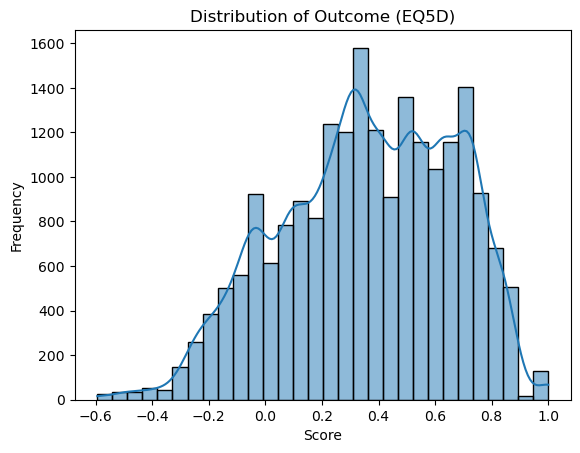

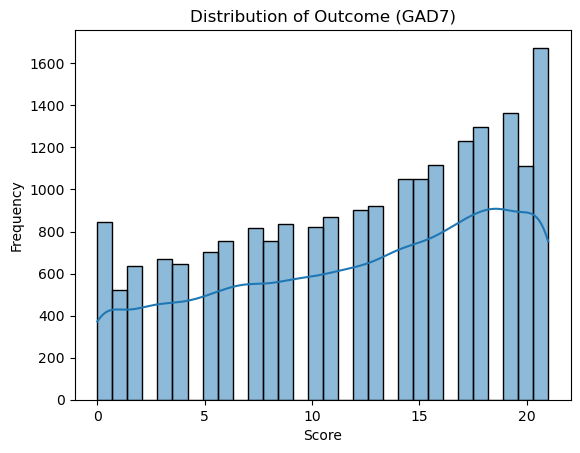

In [4]:
sns.histplot(eq5d['EQ5D_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (EQ5D)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(gad7['GAD7_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (GAD7)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix of Predictors

In [6]:
eq5d.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropathi

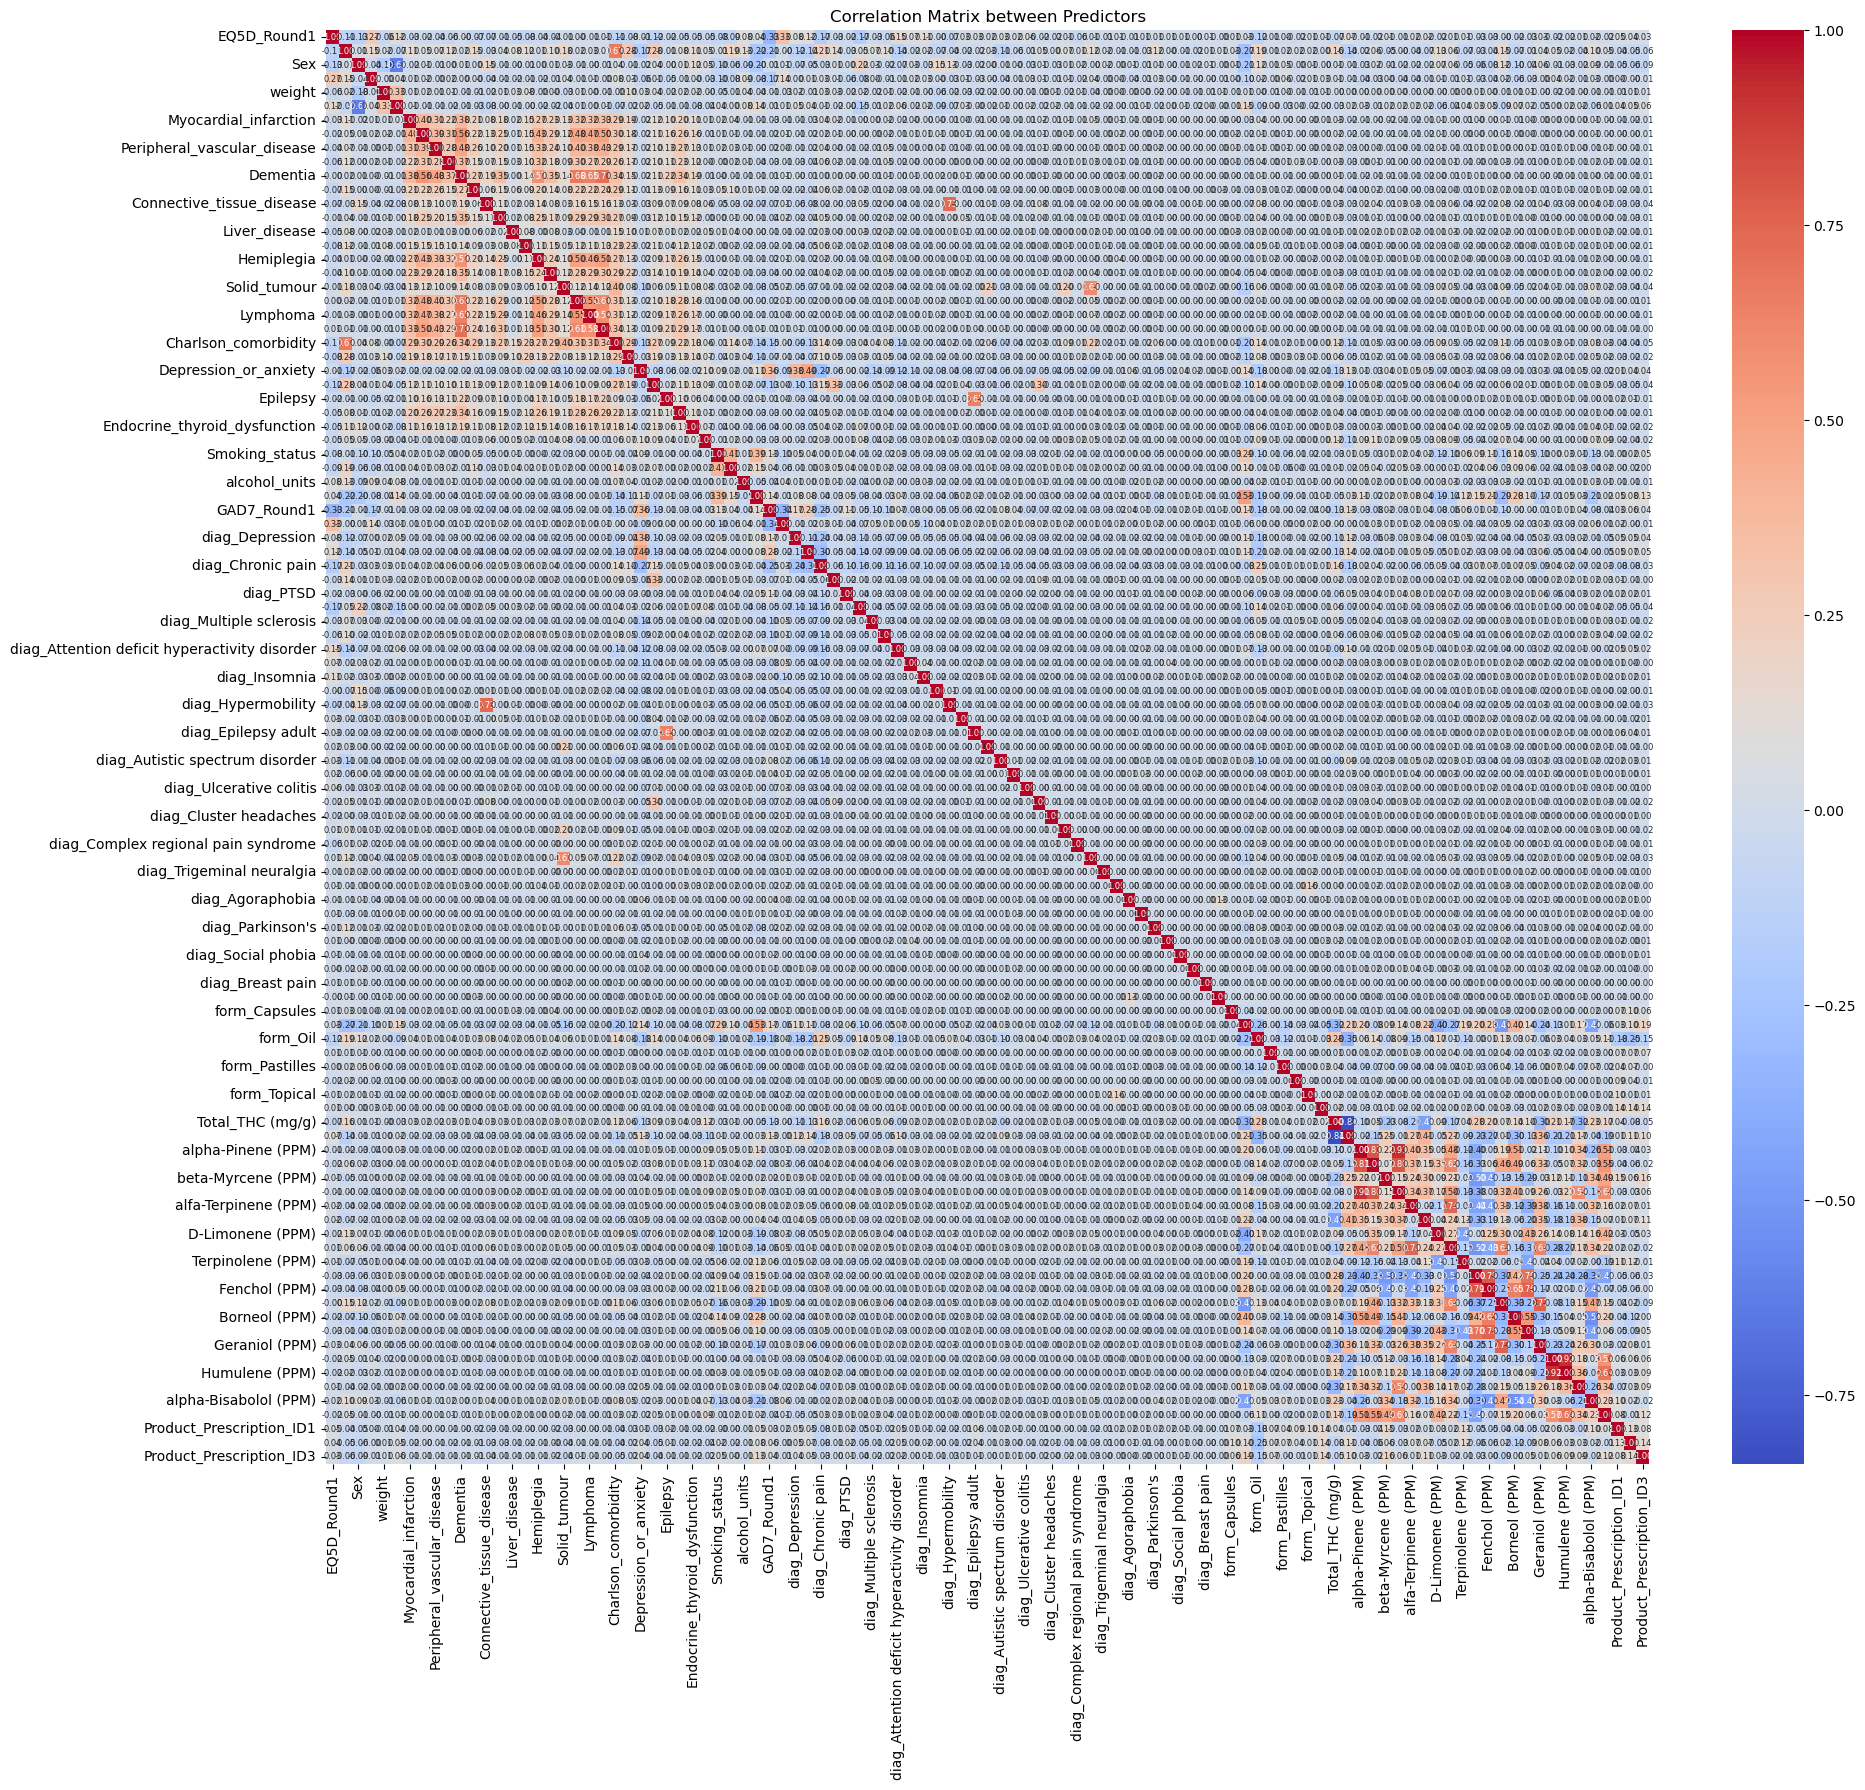

In [ ]:
# Remove follow up scores
eq5d_predictors = eq5d.drop(columns=['SID',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6'])

# Calculate correlation matrix between predictors
eq5d_corr_matrix = eq5d_predictors.corr()

plt.figure(figsize=(20, 18))  

sns.heatmap(
    eq5d_corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 6}  
)

plt.xticks(rotation=90) 
plt.yticks(rotation=0)  
plt.title('Correlation Matrix between Predictors')
plt.tight_layout()
plt.show()


c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


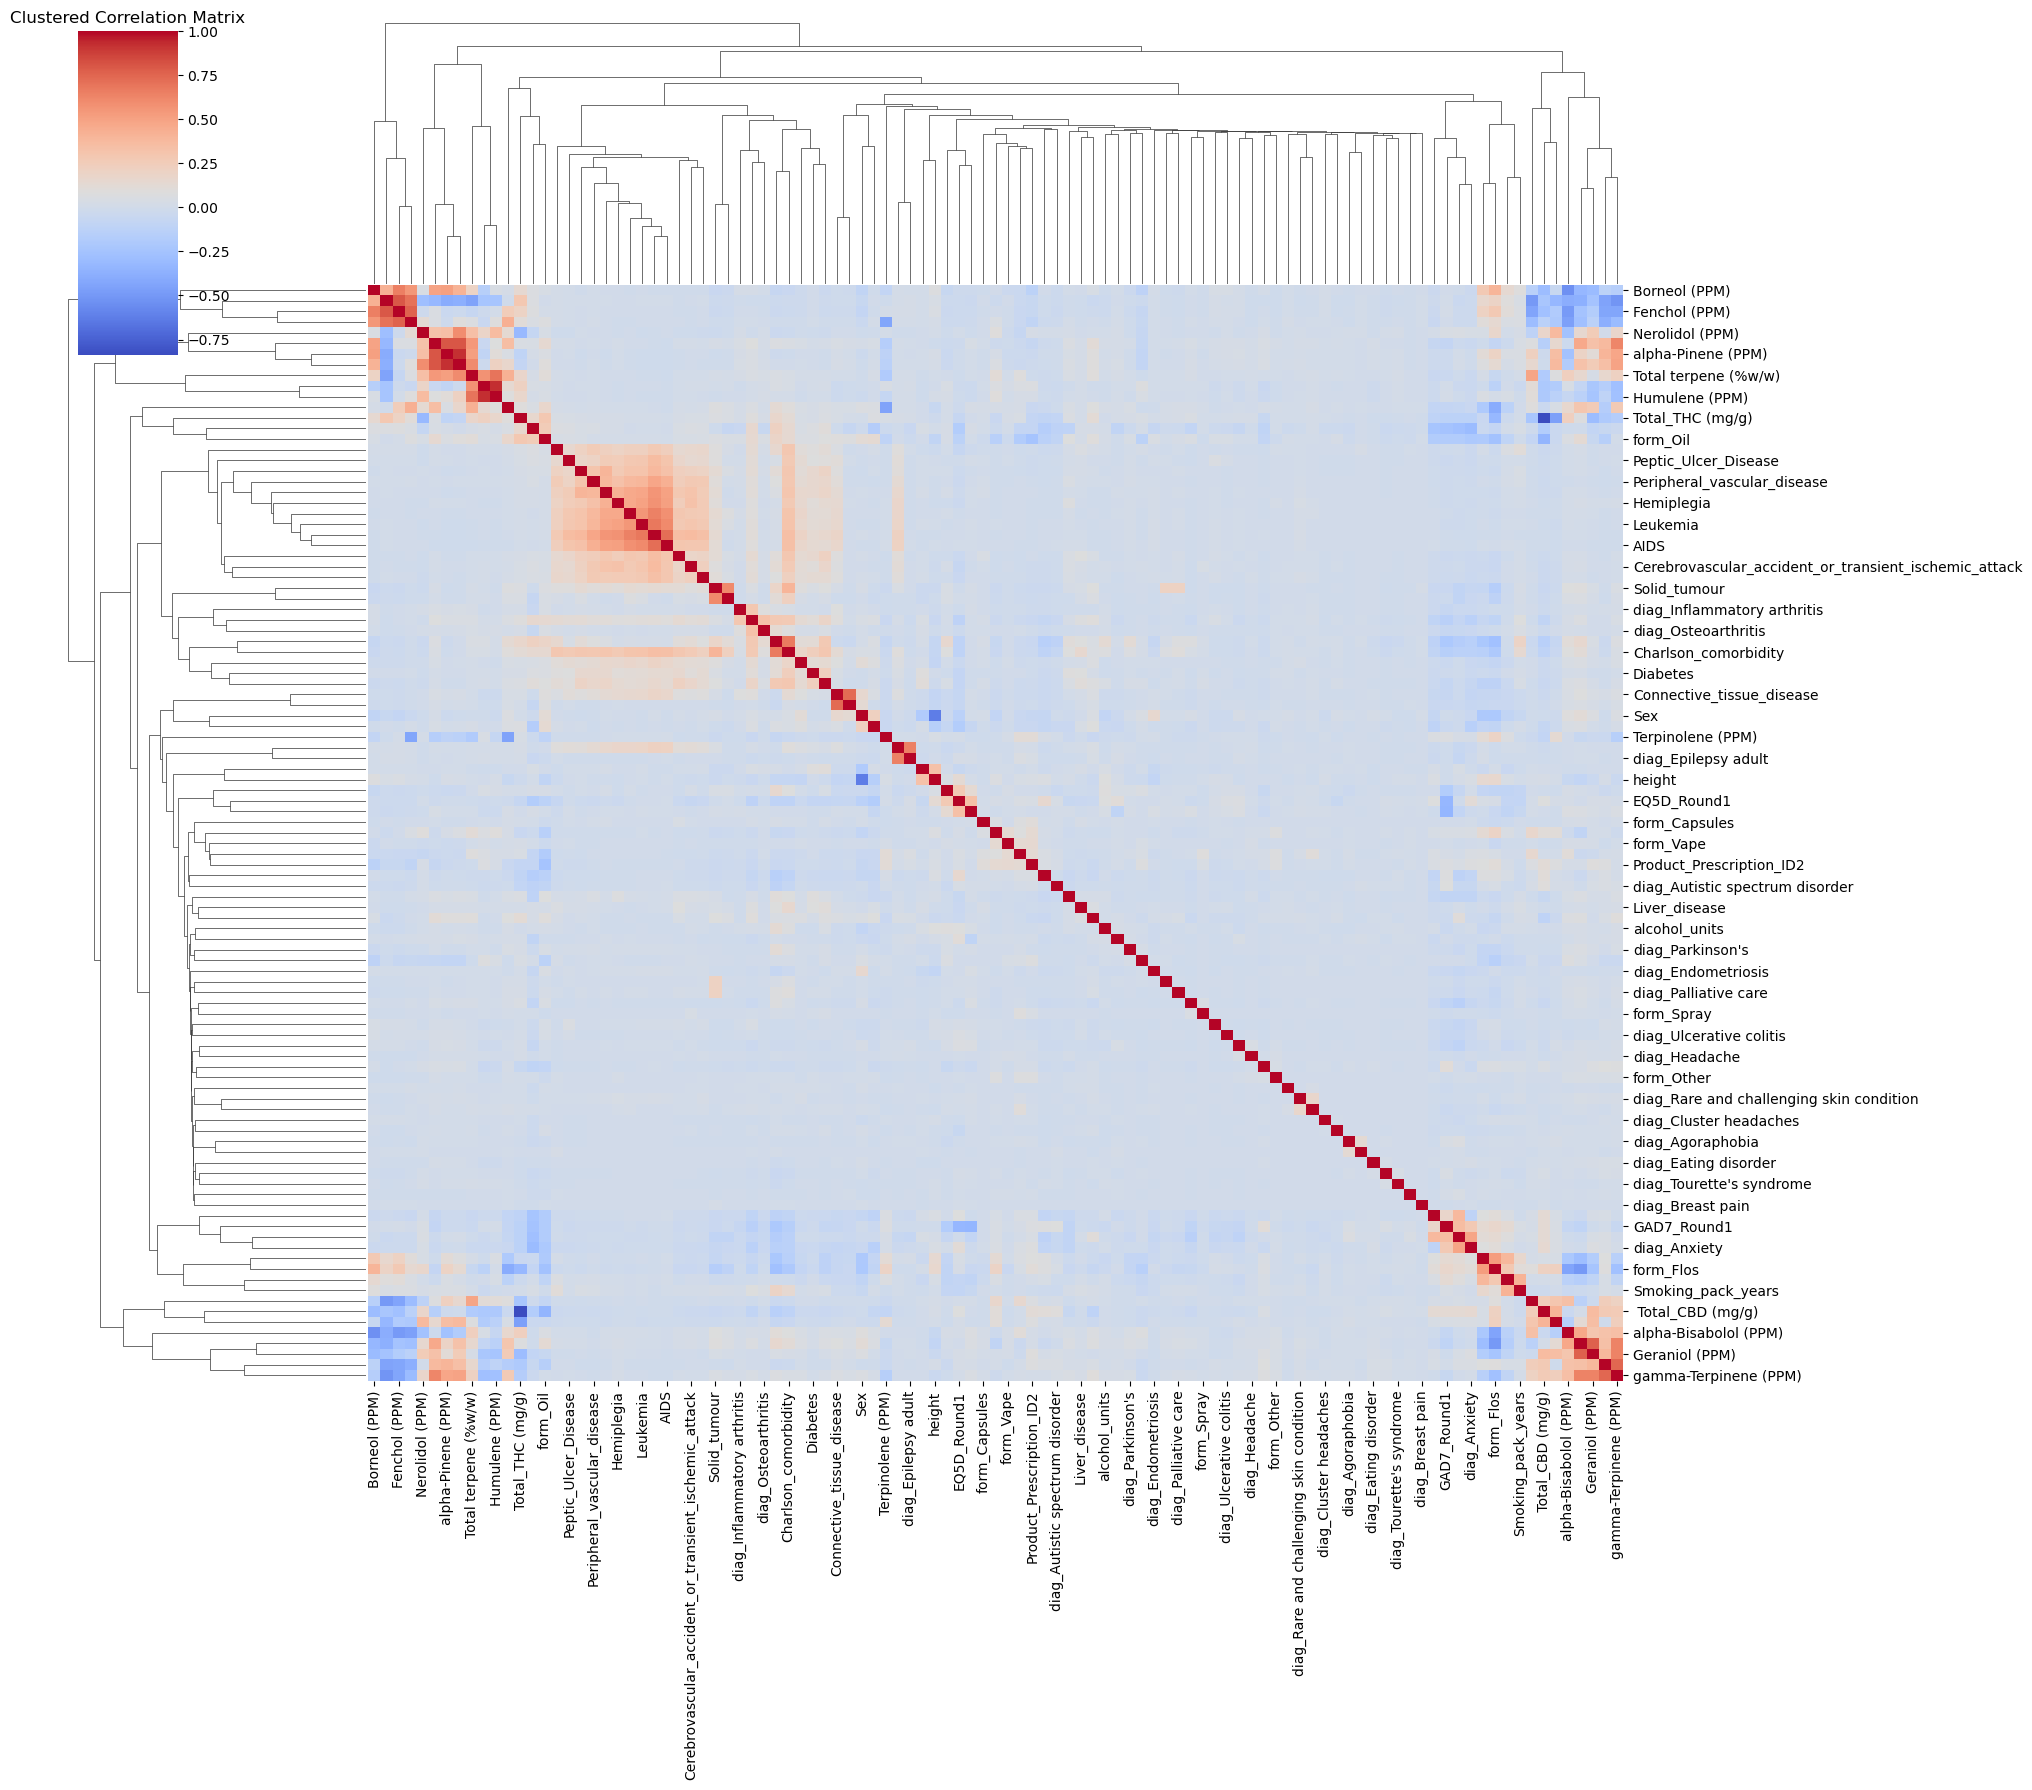

In [10]:
sns.clustermap(
    eq5d_corr_matrix,
    cmap='coolwarm',
    figsize=(20, 18)
)
plt.title('Clustered Correlation Matrix')
plt.show()


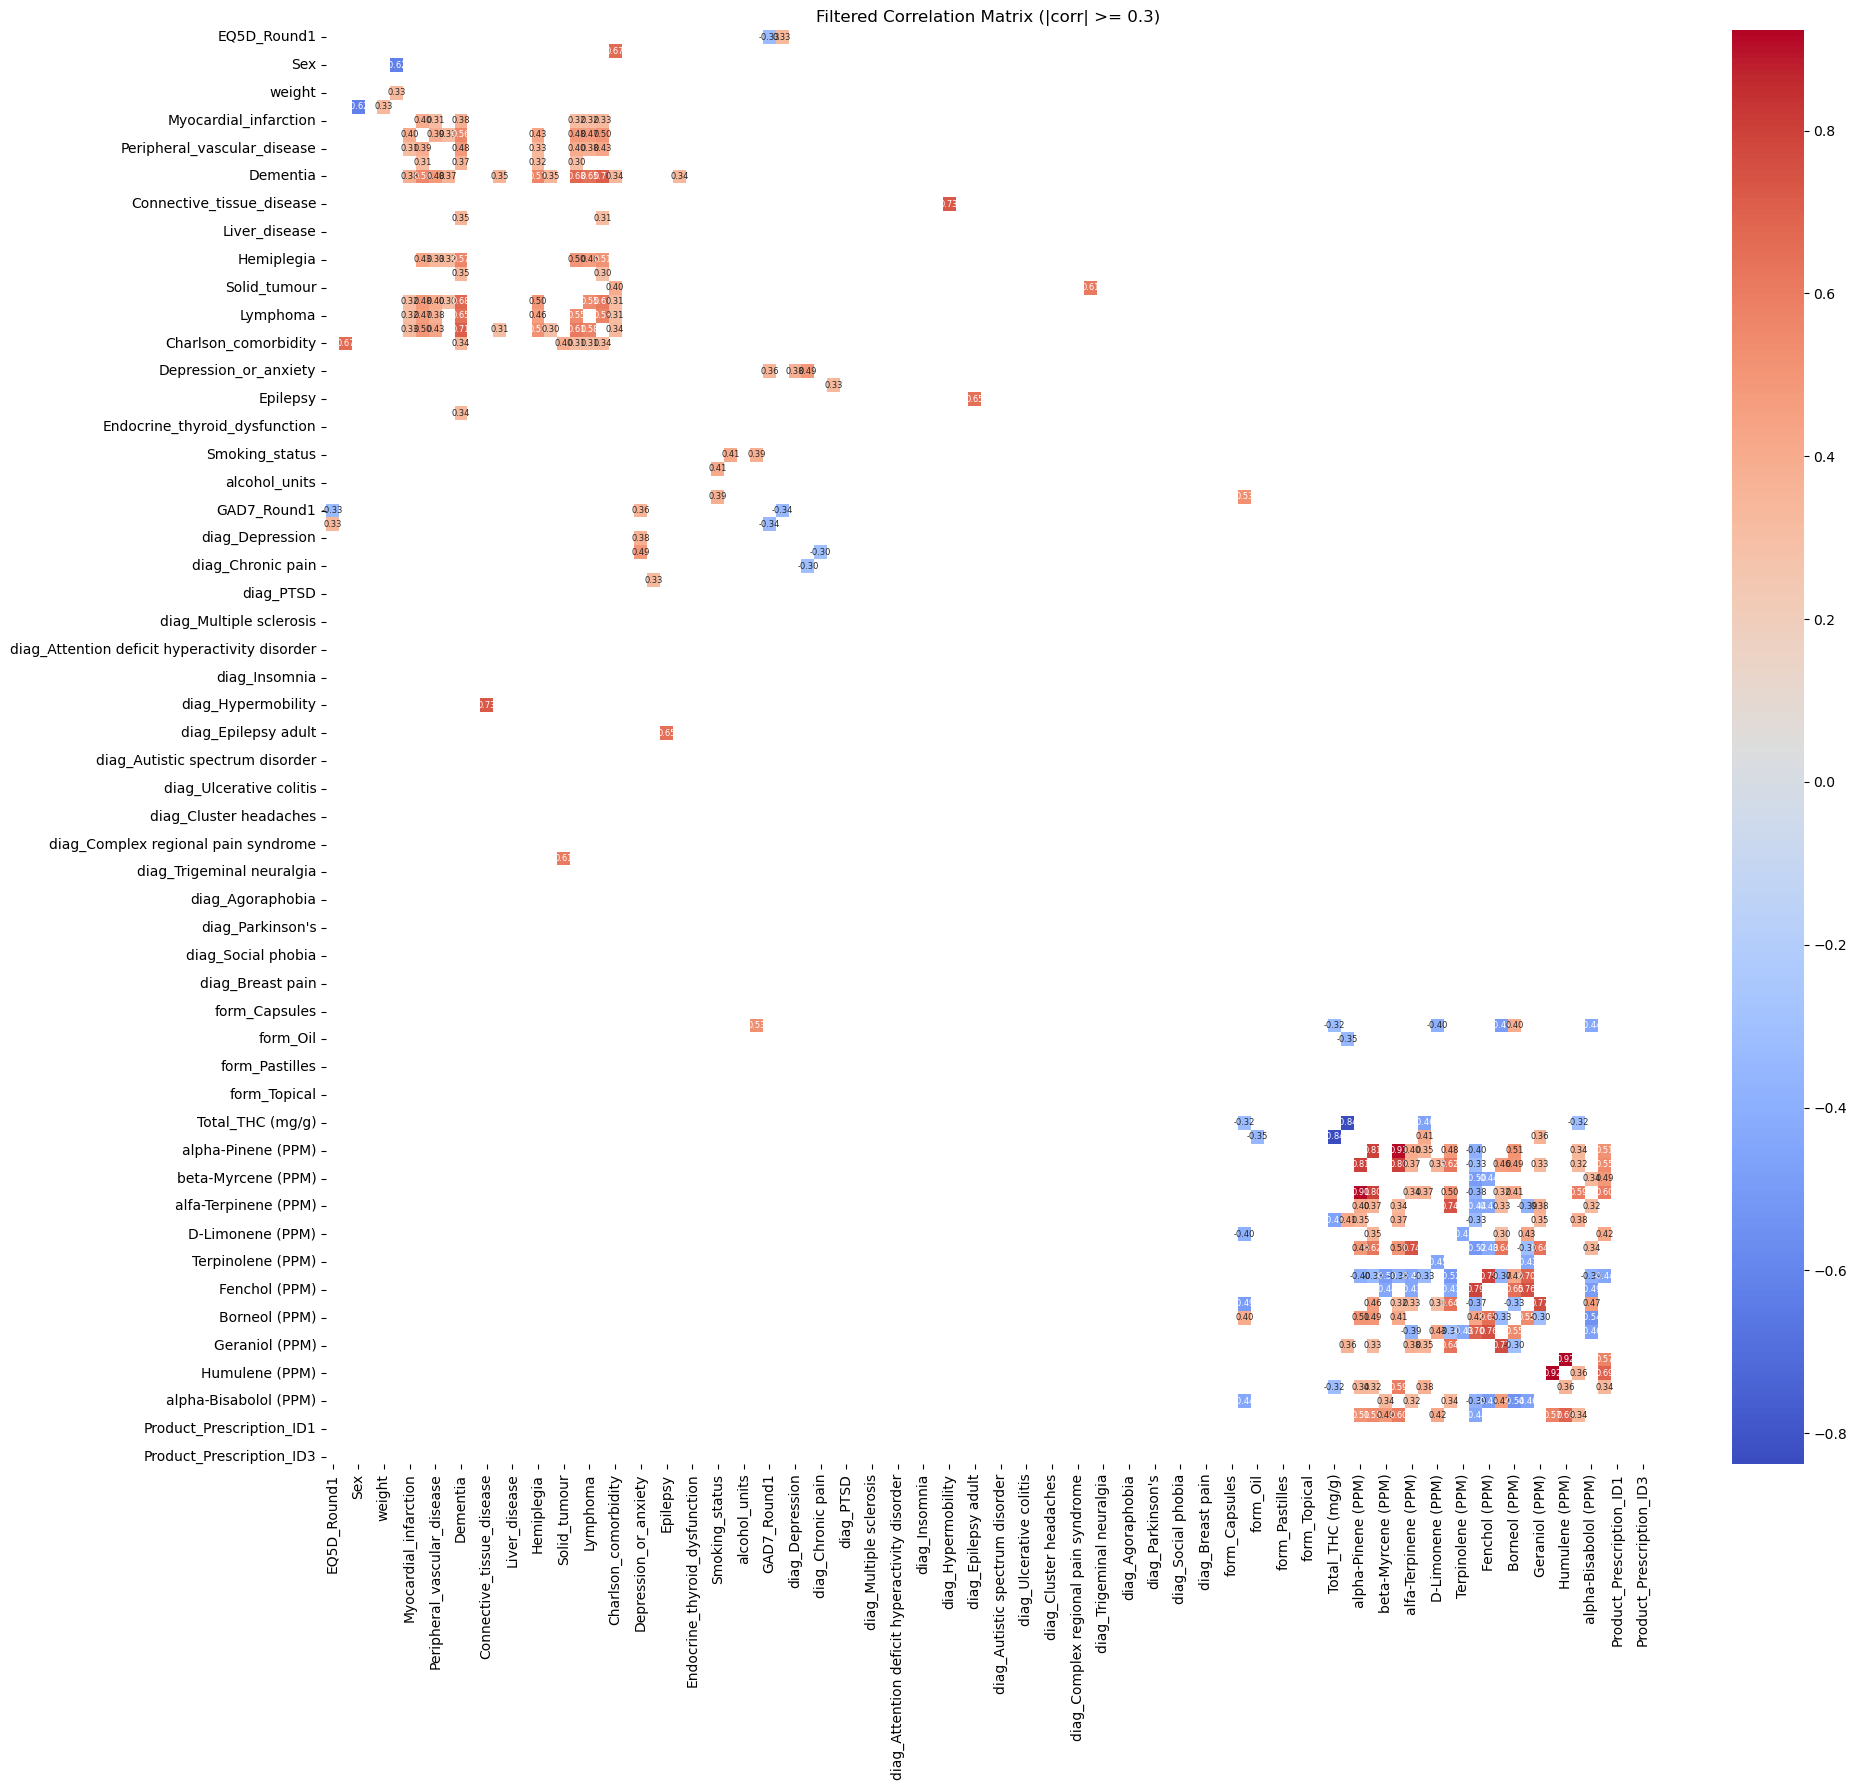

In [ ]:
import numpy as np

threshold = 0.3
filtered_corr = eq5d_corr_matrix.where(np.abs(eq5d_corr_matrix) >= threshold)

np.fill_diagonal(filtered_corr.values, np.nan)

plt.figure(figsize=(20, 18))

sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    mask=filtered_corr.isnull()  # hide NaN
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Filtered Correlation Matrix (|corr| >= {threshold})')
plt.tight_layout()
plt.show()



Correlation between Predictors and Outcomes

In [5]:
eq5d_predictors = eq5d.drop(columns=['SID',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6'])
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round2'].drop('EQ5D_Round2')
print(eq5d_cor.sort_values(ascending=False))

EQ5D_Round1                                      0.640206
occupation                                       0.231003
insomniaEfficacyMeasure_Round1                   0.216911
diag_Anxiety                                     0.139598
diag_Attention deficit hyperactivity disorder    0.122515
                                                   ...   
GAD7_Round1                                     -0.146237
form_Oil                                        -0.146865
Age                                             -0.158901
diag_Fibromyalgia                               -0.161465
diag_Chronic pain                               -0.170767
Name: EQ5D_Round2, Length: 103, dtype: float64


In [6]:
## Absolute Value Correlation with Outcome
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round2'].drop('EQ5D_Round2')

# Turn into DataFrame, with absolute value for sorting
corr_df = eq5d_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})

eq5d_corr = corr_df
print(eq5d_corr)


                          Predictor  Correlation  Abs_Correlation
0                       EQ5D_Round1     0.640206         0.640206
1                        occupation     0.231003         0.231003
2    insomniaEfficacyMeasure_Round1     0.216911         0.216911
3                 diag_Chronic pain    -0.170767         0.170767
4                 diag_Fibromyalgia    -0.161465         0.161465
..                              ...          ...              ...
98        diag_Trigeminal neuralgia     0.001006         0.001006
99               diag_Endometriosis    -0.000855         0.000855
100              diag_Social phobia     0.000815         0.000815
101                            AIDS     0.000764         0.000764
102                  Linalool (PPM)    -0.000051         0.000051

[103 rows x 3 columns]


In [3]:
## Absolute Value Correlation with Outcome (GAD7)

gad7_predictors = gad7.drop(columns=['SID','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
  'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
gad7_cor= gad7_predictors.corr()['GAD7_Round2'].drop('GAD7_Round2')

# Turn into DataFrame, with absolute value for sorting
corr_df = gad7_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})
gad7_corr = corr_df
print(gad7_corr)

                          Predictor  Correlation  Abs_Correlation
0                       GAD7_Round1     0.519722         0.519722
1                       EQ5D_Round2    -0.482695         0.482695
2                       EQ5D_Round1    -0.275367         0.275367
3    insomniaEfficacyMeasure_Round1    -0.217262         0.217262
4             Depression_or_anxiety     0.204812         0.204812
..                              ...          ...              ...
99             diag_Eating disorder     0.000845         0.000845
100                  Humulene (PPM)     0.000551         0.000551
101        Product_Prescription_ID1    -0.000419         0.000419
102                        Lymphoma    -0.000282         0.000282
103        Congestive_heart_failure    -0.000235         0.000235

[104 rows x 3 columns]


Univariate Analysis (EQ5D)

In [33]:
print(eq5d_top)

0                       EQ5D_Round1
1                        occupation
2    insomniaEfficacyMeasure_Round1
3                 diag_Chronic pain
4                 diag_Fibromyalgia
Name: Predictor, dtype: object


In [7]:
import statsmodels.api as sm
eq5d_top = eq5d_corr['Predictor'].head(10)

univariate_eq5d = []

for predictor in eq5d_top:
    X = eq5d[[predictor, 'EQ5D_Round2']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['EQ5D_Round2']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_eq5d.append(result)


univariate_eq5d_df = pd.DataFrame(univariate_eq5d)
print(univariate_eq5d_df)


                        Predictor  Beta Coefficient          p-val  R-squared
0                     EQ5D_Round1          0.577047   0.000000e+00   0.409864
1                      occupation          0.117247  1.693714e-247   0.053362
2  insomniaEfficacyMeasure_Round1          0.028029  9.201720e-218   0.047051
3               diag_Chronic pain         -0.103782  1.622175e-134   0.029161
4               diag_Fibromyalgia         -0.160440  2.766600e-120   0.026071
5                             Age         -0.003549  1.649604e-116   0.025250
6                        form_Oil         -0.090323   1.254578e-99   0.021569
7                     GAD7_Round1         -0.006312   8.729489e-99   0.021385
8            Charlson_comorbidity         -0.013422   5.585464e-92   0.019898
9                    diag_Anxiety          0.094778   4.182570e-90   0.019488


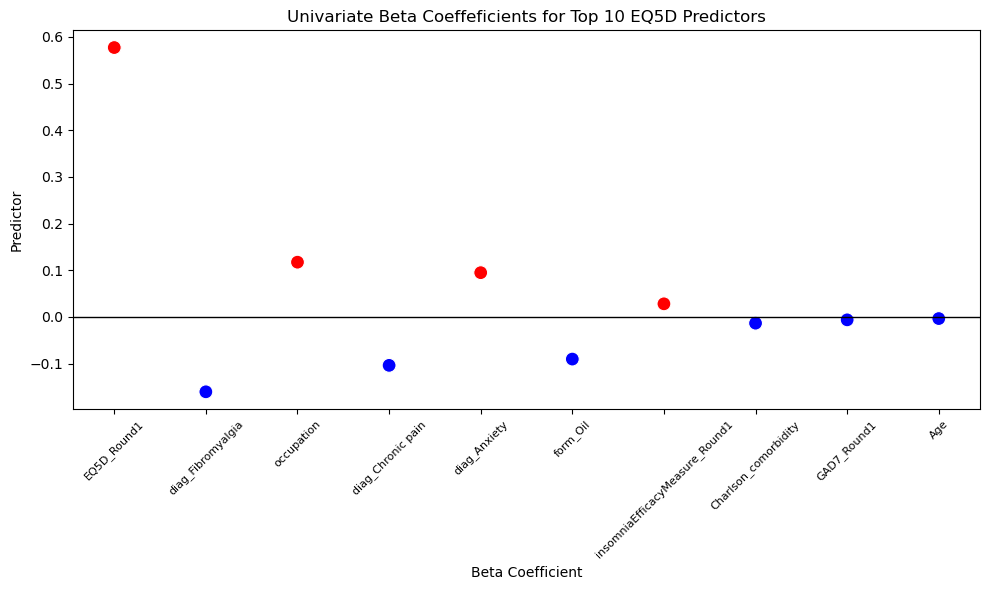

In [23]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_eq5d_df['Abs_Beta'] = univariate_eq5d_df['Beta Coefficient'].abs()
df_plot = univariate_eq5d_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 EQ5D Predictors')
plt.xlabel('Beta Coefficient')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()

Univariate Analysis (GAD7)

In [18]:
gad7_top = gad7_corr['Predictor'].head(10)

univariate_gad7 = []

for predictor in gad7_top:
    X = gad7[[predictor, 'GAD7_Round2']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['GAD7_Round2']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_gad7.append(result)


univariate_gad7_df = pd.DataFrame(univariate_gad7)
print(univariate_gad7_df)

                        Predictor  Beta Coefficient          p-val  R-squared
0                     GAD7_Round1          0.438839   0.000000e+00   0.270111
1                     EQ5D_Round2         -9.441518   0.000000e+00   0.232994
2                     EQ5D_Round1         -4.855012   0.000000e+00   0.075827
3  insomniaEfficacyMeasure_Round1         -0.549205  2.680271e-218   0.047203
4           Depression_or_anxiety          2.201080  1.050352e-193   0.041948
5                      occupation         -1.730265  5.723951e-140   0.030368
6                    diag_Anxiety          1.879735   1.585816e-92   0.020034
7               diag_Chronic pain         -1.616494   1.799681e-85   0.018488
8                       diag_PTSD          2.769857   2.094911e-42   0.009014
9                             Age         -0.040904   2.856557e-41   0.008763


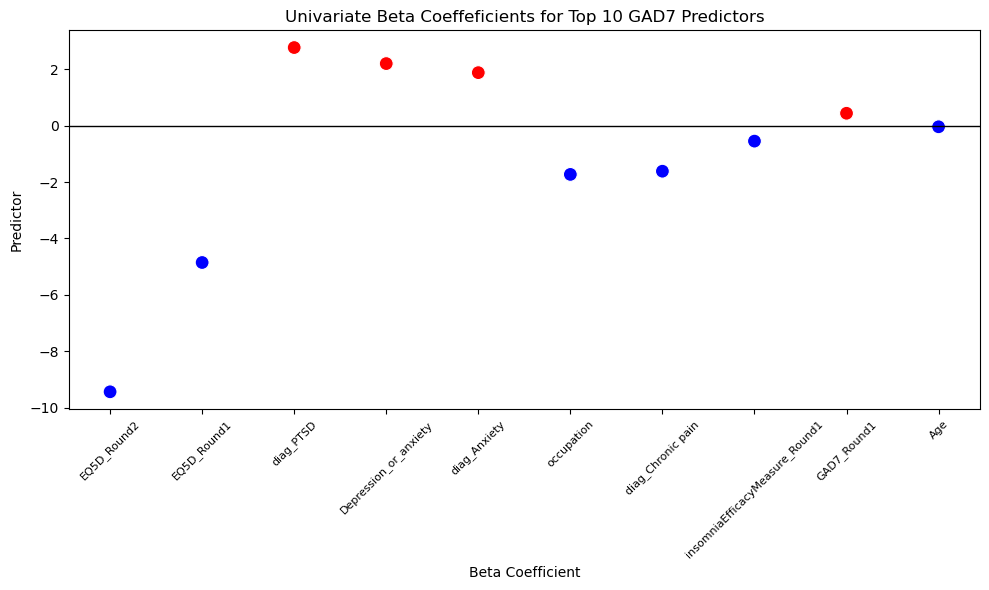

In [26]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_gad7_df['Abs_Beta'] = univariate_gad7_df['Beta Coefficient'].abs()
df_plot = univariate_gad7_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 GAD7 Predictors')
plt.xlabel('Beta Coefficient')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()

Assumptions Checking

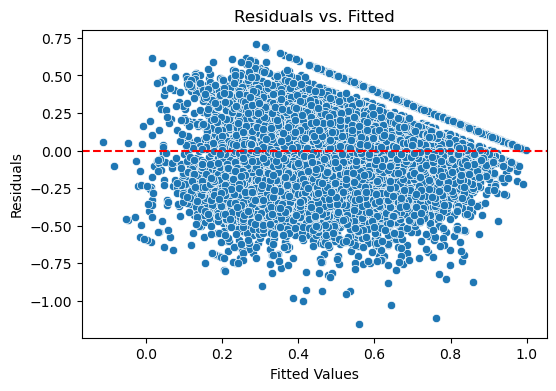

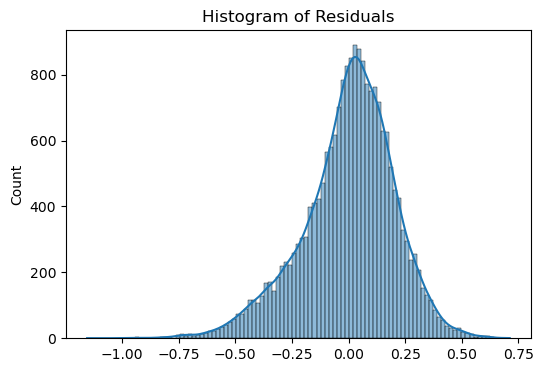

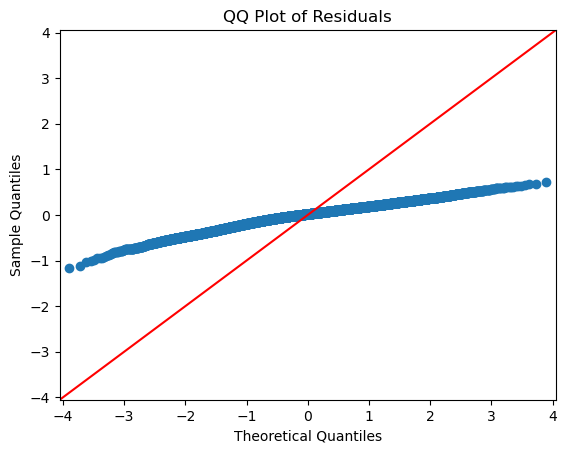

Predictions below min EQ5D: 0
Predictions above max EQ5D: 0


In [58]:
X= eq5d.drop(columns=['SID','EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6'])
X=X.dropna()
X=sm.add_constant(X)
y=eq5d['EQ5D_Round2']

data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns='EQ5D_Round2')
X = sm.add_constant(X)
y = data['EQ5D_Round2']

model =sm.OLS(y,X).fit()

y_pred = model.predict(X)
residuals = y - y_pred

# 1) Residuals vs. Fitted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# 2) Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3) QQ plot for normality
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# 4) Check predictions out of bounds
print("Predictions below min EQ5D:", (y_pred < -0.6).sum())
print("Predictions above max EQ5D:", (y_pred > 1.0).sum())


In [34]:
X.head()

,const,EQ5D_Round1,Age,Sex,occupation,weight,height,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,...,alpha.-Terpineol (PPM),Geraniol (PPM),Caryophyllene (PPM),Humulene (PPM),Nerolidol (PPM),alpha-Bisabolol (PPM),Total terpene (%w/w),Product_Prescription_ID1,Product_Prescription_ID2,Product_Prescription_ID3
0,1.0,0.283,21,0,0,72.0,182.0,0,0,0,...,509.333333,48.333333,2532.333333,818.00,30.00,413.000,0.976667,0,0,0
1,1.0,0.635,44,0,1,88.0,178.0,0,0,0,...,158.000000,100.000000,479.000000,237.00,131.00,440.000,0.670000,1,1,1
2,1.0,0.442,41,0,1,95.0,183.0,0,0,0,...,166.000000,51.480000,2856.000000,808.00,162.00,1545.000,1.243000,2,2,2
3,1.0,0.332,43,0,1,100.0,196.0,0,0,0,...,348.453333,53.268333,3480.055000,1041.14,114.38,906.695,1.255070,2,3,-1
4,1.0,0.390,40,0,0,80.0,185.0,0,0,0,...,245.000000,25.000000,6169.000000,2229.00,54.00,679.000,1.260000,3,4,3


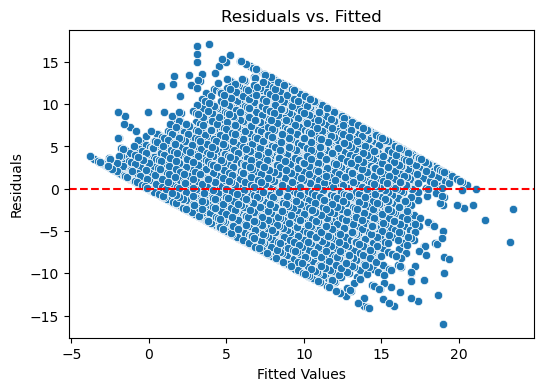

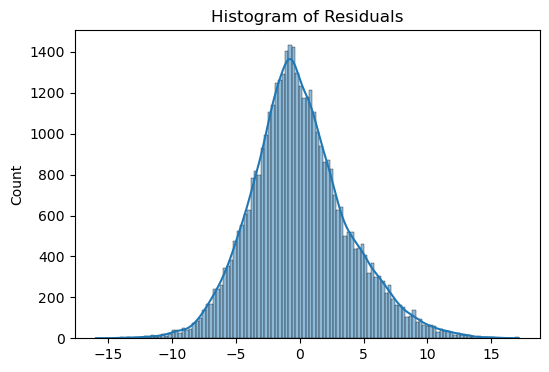

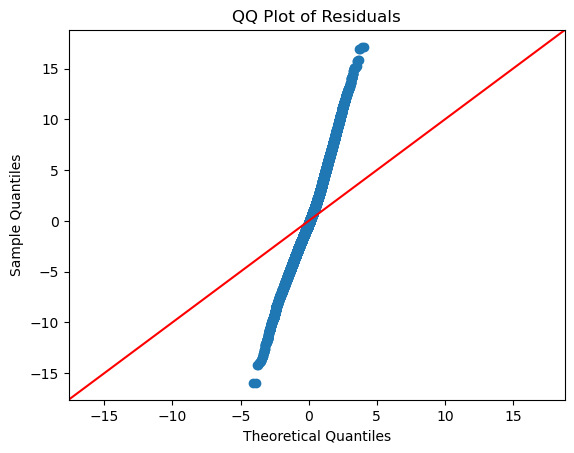

In [64]:
# 1. Prepare y (ensure numeric)
y = pd.to_numeric(gad7['GAD7_Round2'], errors='coerce')

# 2. Prepare X (drop columns)
X = gad7.drop(columns=[
    'SID', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5', 'GAD7_Round6',
    'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9', 'GAD7_Round10',
    'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])

# 3. Align X and y FIRST before any modeling
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

# Fit model (use your cleaned X and y)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)
residuals = y.to_numpy().ravel() - y_pred.to_numpy().ravel()

y_pred = y_pred.to_numpy().ravel()



# Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

Removing variables with high multicollinearity

In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Prepare X and y
X = eq5d.drop(columns=[
    'SID', 'EQ5D_Round2', 'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = eq5d['EQ5D_Round2']

# 2️⃣ Drop rows with NA in either
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='EQ5D_Round2')
y = data['EQ5D_Round2']

# 3️⃣ Remove highly correlated predictors
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

# 4️⃣ Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# 5️⃣ Fit Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# 6️⃣ Fit OLS (use sklearn LinearRegression for split compatibility)
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)

# 7️⃣ Collect metrics
results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})

print(results)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared       MSE
0  Random Forest  Train   0.919407  0.006088
1  Random Forest   Test   0.434744  0.042050
2            OLS  Train   0.444136  0.041989
3            OLS   Test   0.445744  0.041232


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = gad7.drop(columns=[
    'SID',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# OLS linear regression
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})

print(results)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)', 'GAD7_Round1']
           Model    Set  R_squared        MSE
0  Random Forest  Train   0.932673   1.931118
1  Random Forest   Test   0.520812  14.083812
2            OLS  Train   0.493337  14.532405
3            OLS   Test   0.501268  14.658250


Penalised Regression

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


df=eq5d.drop(['SID','EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df= df[df['EQ5D_Round2'].notnull()] 

X=df.drop(columns=['EQ5D_Round2'])
y=df['EQ5D_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared       MSE       Alpha
0  Ridge  Train   0.444084  0.041993  184.206997
1  Ridge   Test   0.446011  0.041212  184.206997
2  Lasso  Train   0.442122  0.042141    0.001326
3  Lasso   Test   0.447607  0.041093    0.001326


In [89]:
y_train.head()

,EQ5D_Round2,EQ5D_Round2
18599,0.768,0.768
8125,0.837,0.837
5462,0.332,0.332
6442,0.837,0.837
14955,0.770,0.770


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = gad7.drop(columns=[
    'SID',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared        MSE       Alpha
0  Ridge  Train   0.493322  14.532840  138.949549
1  Ridge   Test   0.500716  14.674478  138.949549
2  Lasso  Train   0.492133  14.566951    0.016768
3  Lasso   Test   0.501865  14.640711    0.016768
